In [1]:
import xarray as xr
import numpy as np
data = "/Users/stewart/projects/uwnet/data/processed/training.nc"
dataset = xr.open_dataset(data)
dataset = dataset.isel(y=list(range(28, 36)))

In [2]:
from collections import Counter
precip_values = dataset.Prec.values.ravel()
zero_precip_percentile = (100 * (Counter(precip_values)[0] / len(precip_values))) + 0.001
percentiles = [zero_precip_percentile, 10, 30, 70, 90, 100 - zero_precip_percentile, 100]

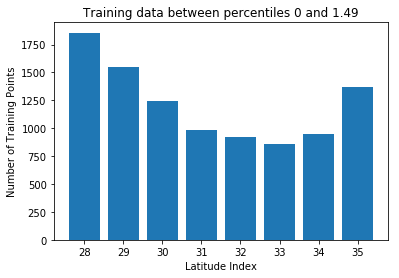

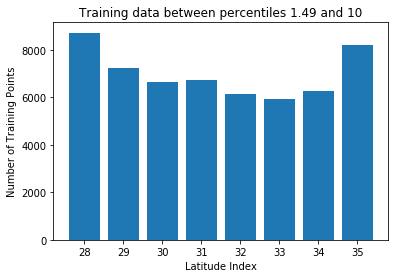

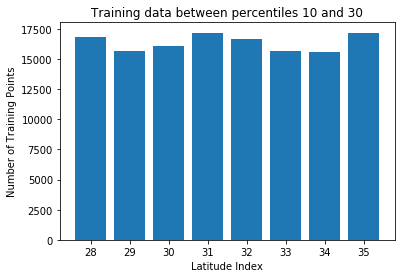

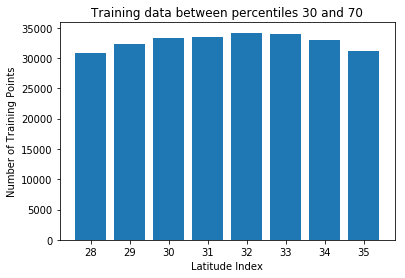

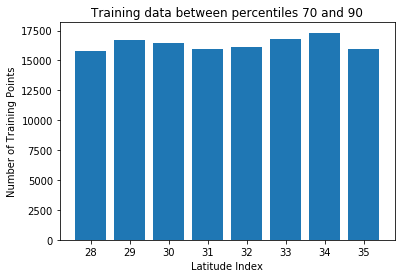

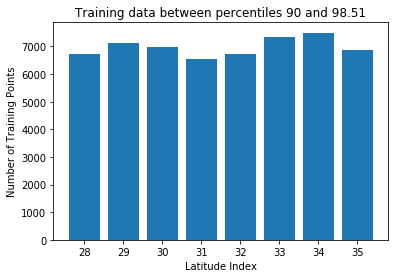

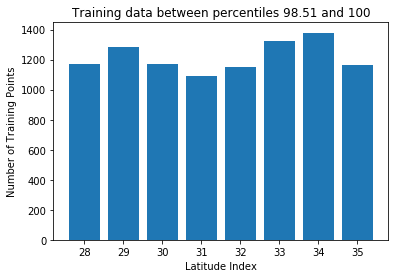

In [7]:
from matplotlib import pyplot as plt
latitude_indices = list(range(28, 36))
last_percentile = 0
for percentile in percentiles:
    min_precip = np.percentile(precip_values, last_percentile)
    max_precip = np.percentile(precip_values, percentile)
    filtered_ds = dataset.where(dataset.Prec >= min_precip).where(dataset.Prec < max_precip)
    n_training_points_by_latitude = (~np.isnan(filtered_ds.Prec.values)).sum(axis=0).sum(axis=1)
    plt.bar(list(range(len(latitude_indices))), n_training_points_by_latitude, tick_label=latitude_indices)
    plt.xlabel('Latitude Index')
    plt.ylabel('Number of Training Points')
    plt.title(f'Training data between percentiles {round(last_percentile, 2)} and {round(percentile, 2)}')
    last_percentile = percentile
    plt.show()

In [6]:
transition_row = []
last_percentile = 0
for percentile in percentiles:
    transition_row.append(round((percentile - last_percentile) / 100, 4))
    last_percentile = percentile
transition_matrix = np.repeat(np.array([transition_row]), len(transition_row), 0)
print('Transition Matrix:')
print(transition_matrix)

Transition Matrix:
[[0.0149 0.0851 0.2    0.4    0.2    0.0851 0.0149]
 [0.0149 0.0851 0.2    0.4    0.2    0.0851 0.0149]
 [0.0149 0.0851 0.2    0.4    0.2    0.0851 0.0149]
 [0.0149 0.0851 0.2    0.4    0.2    0.0851 0.0149]
 [0.0149 0.0851 0.2    0.4    0.2    0.0851 0.0149]
 [0.0149 0.0851 0.2    0.4    0.2    0.0851 0.0149]
 [0.0149 0.0851 0.2    0.4    0.2    0.0851 0.0149]]
